In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")["Close"]

log_returns = np.log(data / data.shift(1)).dropna()

#percentage returns
returns = data.pct_change().dropna()

mu = returns.mean() * 252
sigma = returns.std() * np.sqrt(252)

# 252 because we are assuming that 252 the number of the trading days in year

print(f"Estimated mu = {mu.iloc[0]: .4f}, sigma = {sigma.iloc[0]: .4f}")

[*********************100%***********************]  1 of 1 completed

Estimated mu =  0.2990, sigma =  0.3357


***Fixed Strike Asian Option***

Fixed Strike Asian Call Price: 127.33928398122609


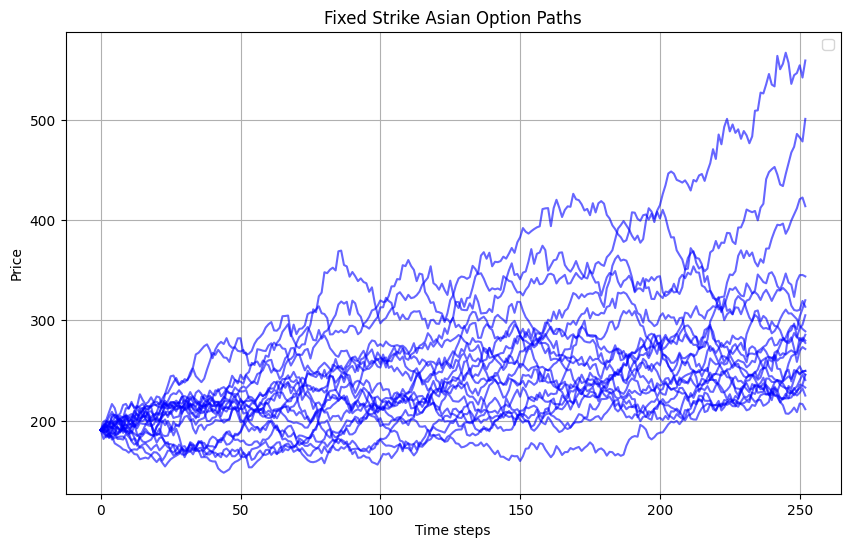

In [3]:
S0 = data.iloc[-1]
T = 1.0  # we are simulationg for a total 1 year
n_steps = 252  # The no of the step that we are doing is 252 in a year ,your st will be 1/252
n_paths = 20  # we are simulating the 20 paths
dt = T / n_steps
K = 110                 # Strike price
r = 0.05                # Risk-free rate (defined for self-contained cell)

# Extract scalar values from Series for efficiency
mu_scalar = mu.iloc[0]
sigma_scalar = sigma.iloc[0]

paths = np.zeros((n_steps+1, n_paths)) # data of the path gat stored in the col
paths[0] = S0

for t in range(1, n_steps+1):
  Z = np.random.normal(size = n_paths)
  paths[t] = paths[t-1] + (mu_scalar)*paths[t-1]*dt + sigma_scalar*paths[t-1]*np.sqrt(dt)*Z



# For Asian option, ST is the average price over the path
ST = np.mean(paths, axis = 0)


payoffs =  np.maximum(ST - K, 0)

# Discounted price
price = np.exp(-r * T) * np.mean(payoffs)

print("Fixed Strike Asian Call Price:", price)


# Plot sample paths
plt.figure(figsize=(10,6))

for i in range(n_paths):
    plt.plot(paths[:, i], color="blue", alpha=0.6)

plt.title("Fixed Strike Asian Option Paths")
plt.xlabel("Time steps")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

***Floating Strike Price***

Floating Strike Asian Call Price: 22.194493016219745


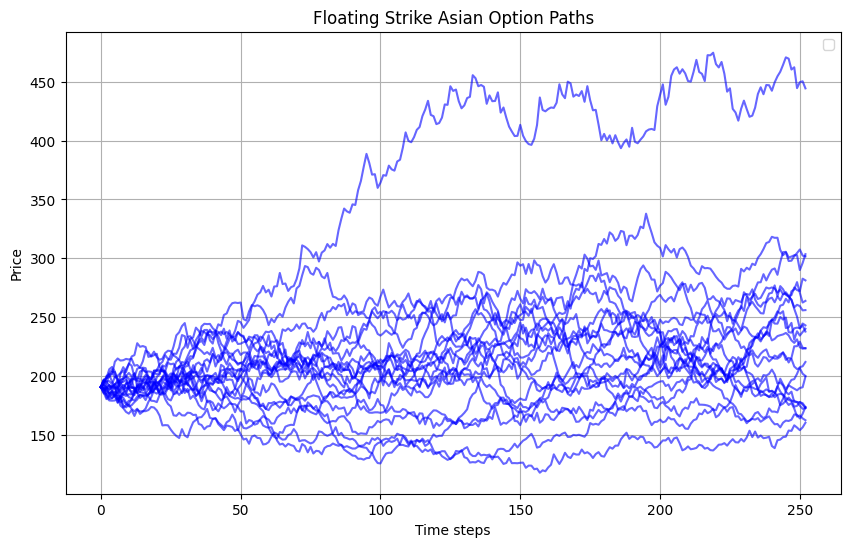

In [4]:
S0 = data.iloc[-1]
T = 1.0  # we are simulationg for a total 1 year
n_steps = 252  # The no of the step that we are doing is 252 in a year ,your st will be 1/252
n_paths = 20  # we are simulating the 20 paths
dt = T / n_steps
K = 110                 # Strike price
r = 0.05                # Risk-free rate (defined for self-contained cell)

# Extract scalar values from Series for efficiency
mu_scalar = mu.iloc[0]
sigma_scalar = sigma.iloc[0]

paths = np.zeros((n_steps+1, n_paths)) # data of the path gat stored in the col
paths[0] = S0

for t in range(1, n_steps+1):
  Z = np.random.normal(size = n_paths)
  paths[t] = paths[t-1] + (mu_scalar)*paths[t-1]*dt + sigma_scalar*paths[t-1]*np.sqrt(dt)*Z




S_avg = np.mean(paths, axis = 0)
ST = paths[-1]

payoffs =  np.maximum(ST - S_avg, 0)

# Discounted price
price = np.exp(-r * T) * np.mean(payoffs)

print("Floating Strike Asian Call Price:", price)


# Plot sample paths
plt.figure(figsize=(10,6))

for i in range(n_paths):
    plt.plot(paths[:, i], color="blue", alpha=0.6)

plt.title("Floating Strike Asian Option Paths")
plt.xlabel("Time steps")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()